# Continuous Optimization

This time, we will use the `deap` library to try some evolutionary algorithms for continuous and combinatorial optimizatioin. The main advantage of using `deap` is that many of the genetic operators we will need are already implemented in the library.

Let's start with the continuous optimization. We will implement an algorithm that optimizes a given function - for our example, we will use so called Rastrigin function that is commonly used to evaluate optimization algorithms.

In [2]:
import random

from deap import base
from deap import creator
from deap import tools

IND_DIM = 20
LOWER_BOUND = -5.12
UPPER_BOUND = 5.12

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))     # fitness for minimization - notice the negative weight
creator.create("Individual", list, fitness=creator.FitnessMin)  # create class for individuals - derived from list and uses the fitness defined above

toolbox = base.Toolbox()
toolbox.register("attr_val", random.uniform, LOWER_BOUND, UPPER_BOUND)             # generates a single random number between 0 and 1
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_val, IND_DIM)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

Let's now test the function we just defined in the toolbox.

In [3]:
print("attr_val:", toolbox.attr_val())
print("individual:", toolbox.individual()[:5]) # plot first 5 elements of the individual
print("individual length: ", len(toolbox.individual()))
print()
print("population(5):", toolbox.population(5))  # list of lists

attr_val: 2.5313859280627806
individual: [3.3958435570328964, -0.43091755855763925, -0.9981144732815004, 1.454041346101719, 2.62130031959206]
individual length:  20

population(5): [[-0.9822416205313287, 2.774339908159611, 1.254755534726593, 1.4601608440758618, 0.30106173443679385, 1.6824121405604204, -3.632877853595961, 2.962581463345619, -4.0922218871395435, -4.695032661784085, 3.1379127380001917, 2.7247419539968227, -3.679363932811672, -2.7251280378445553, 1.2222219562726533, 4.353324781877492, -1.7983917546344377, -2.921028947527949, -4.023971624140287, -1.48367091274705], [3.5043286701548544, 2.5431354911472726, 0.6512256781839376, 1.0367523177031615, -2.03567438913847, -1.8865010938576168, -3.321854536500548, -1.3667890912193057, -0.01897708154672184, 3.842970340611479, -2.8254529631093432, -0.8800335587627481, -4.307037793408498, -1.7584220949115368, -2.5626765290100333, 4.71804206292203, 1.029476075494121, 3.4125726113968478, -1.0104440456855093, 4.6039462440315875], [3.2779882

Next, we need to define the genetic operators we will use in the algorithm.

In [3]:
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=2)

And finally, we define the fitness function

In [4]:
import math
def rastrigin(ind):
    return 10*len(ind) + sum([(x**2 - 10 * math.cos(2 * math.pi * x)) for x in ind]),

toolbox.register("evaluate", rastrigin)

We can now combine everything together and run the algorithm.

In [5]:
from deap import algorithms
import numpy as np

s = tools.Statistics(lambda x: x.fitness.values[0])
s.register("mean", np.mean)
s.register("max", max)
s.register("min", min)

hof = tools.HallOfFame(1)

pop = toolbox.population(100)
pop, log = algorithms.eaMuPlusLambda(pop, toolbox, mu=100, lambda_=100, cxpb=0.8, mutpb=0.2, ngen=500, stats=s, halloffame=hof, verbose=False)

print(hof, hof[0].fitness.values[0])

[[-1.9861133926593866, 2.9849344579039983, 0.9969809913127585, -1.9904015851636674, 1.99010256894486, -0.9951646021909609, 0.9948427430626958, -3.9760545734902792, 1.9904849617159877, 0.0012627261607297945, 0.9952733137704773, -0.9878402148178979, -0.9959751787569291, -0.9948954890660278, -0.9975360420115232, -0.9940918434054125, -1.9913841608628584, 1.9844282216056595, 3.9779507049890284, 0.002519280943508541]] 73.65358886628937


### Side quest 1
- plot min/max/mean fitness values using `log` and matplotlib

## Task 1
- try to play with parameters of the algorithm (cx, mut pbs, mu/lambda, mutation/crossover types)
- Check the `deap` documentation for possible types of genetic operators/evolutionary algorithms.
    - specifically [library reference](https://deap.readthedocs.io/en/master/api/index.html)

The optimum of the function should be 0 and the best individual should contain only 0s.


### Side quest 2 - logging
Instead of just toggling different values in the notebook and remembering the results, you can use the code below to log the results. **Always define results = [] or results = {} at the top of the jupyter notebook**

These are only examples that will probably crash, you should include them into your code

In [ ]:
# ********************** VARIANT 1 **********************
# Example 1 how to track results in a jupyter ntb
results = {}

# one result per setting, log as dict keys
results[f"cxpb-{cxpb}_mutpb-{mutpb}"] = hof[0].fitness.values[0]

In [ ]:
# ********************** VARIANT 2 **********************
# Example 2 how to track results in a jupyter ntb

results = []

# **** do EA here, log results ****
results.append({'seed': random_seed, "cxpb": cxpb, "mutpb": mutpb, "result": result})

# I can also create a pandas dataframe and save it to csv!
import pandas as pd

results = pd.DataFrame(results)
results.to_csv('res.csv')

In case you also want to log functions (like mutation types), you can do it like this: 

In [ ]:
# illustration how to log function choices
cx_zoo = {"twopoint": tools.cxTwoPoint, "dummy": lambda x, y: x}

toolbox.register("mate", cxzoo["twopoint"])

# then in logging...
# results.append({'cx': 'twopoint', "result": result})

In [6]:
# ********************** VARIANT 3 **********************
# Use experimental_design.py to generate .json files with results. Then, use the following code to process them:

import os
import json
import pandas as pd

os.listdir('results')

['cx_0.25.json', 'cx_0.3.json']

In [7]:
run_df = []

for fname in os.listdir('results'):
    with open(os.path.join('results', fname), 'r') as f:
        run_data = json.load(f)
    
    name = os.path.splitext(fname)[0]
    run_data = {'name': name, **run_data}  # so that name is the first column
    run_df.append(run_data)
    
run_df = pd.DataFrame(run_df)
run_df

,name,pop_size,cxpb,result
0,cx_0.25,100,0.25,74.676997
1,cx_0.3,100,0.30,58.742042



# Combinatorial Optimization (Travelling Salesman Problem)

Next, let's try to use evolutionary algorithms to solve the travelling salesman problem. We will again use the `deap` library to implement the algorithm. 

We will first generate random points in a plane, we will than search for the shortest cycle visiting all of them.

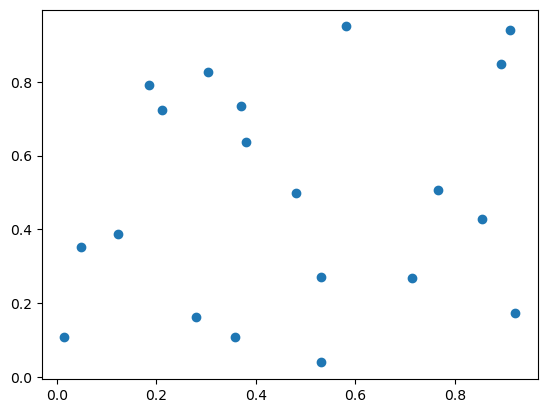

In [6]:
NUM_CITIES = 20

points = np.random.uniform(size=(NUM_CITIES, 2))

import matplotlib.pyplot as plt
plt.scatter(points[:,0], points[:,1])

creator.create("FitnessMinTSP", base.Fitness, weights=(-1.0,))     # fitness for minimization - notice the negative weight
creator.create("IndividualTSP", list, fitness=creator.FitnessMinTSP)  # create class for individuals - derived from list and uses the fitness defined above

toolboxTSP = base.Toolbox()
toolboxTSP.register("indices", random.sample, range(NUM_CITIES), NUM_CITIES)
toolboxTSP.register("individual", tools.initIterate, creator.Individual, toolboxTSP.indices) # initIterate can be used to initialize individual from any iterable object
toolboxTSP.register("population", tools.initRepeat, list, toolboxTSP.individual)

Let's again see, what the functions we defined in the toolbox do:

In [7]:
print("indices:", toolboxTSP.indices())
print("individual:", toolboxTSP.individual())

indices: [8, 0, 2, 6, 11, 18, 9, 4, 3, 10, 14, 19, 1, 7, 13, 12, 16, 5, 15, 17]
individual: [2, 17, 12, 10, 13, 8, 5, 11, 3, 18, 16, 1, 4, 19, 9, 6, 7, 15, 14, 0]


We will now implement the fitness function -- sum of Euclidean distances between consecutive points.

In [8]:
def fitness(ind, points):
    ordered = points[ind]
    fit = 0
    for s, e in zip(ordered, ordered[1:]):
        fit += np.linalg.norm(s - e)
    fit += np.linalg.norm(ordered[0] - ordered[-1])
    return fit,

toolboxTSP.register("evaluate", fitness, points=points)
toolboxTSP.register("mate", tools.cxOrdered)
toolboxTSP.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolboxTSP.register("select", tools.selTournament, tournsize=2)

We can now run the algorithm

In [9]:
pop = toolboxTSP.population(n=100)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
    
pop, log = algorithms.eaMuPlusLambda(pop, toolboxTSP, mu=100, lambda_=100, cxpb=0.8, mutpb=0.2, ngen=500, stats=stats, halloffame=hof, verbose=False)

Let's now plot the best solution (the simple plot does not show the edge from the first to the last node, but it is computed correctly in the individual).

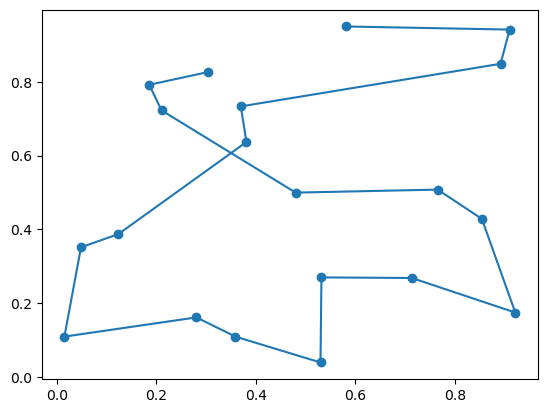

In [10]:
plt.scatter(points[:,0], points[:,1])
plt.plot(points[hof[0]][:,0], points[hof[0]][:,1])

## Task 2

You can now try experimenting with the solution to the TSP - what will happen, if we increase the number of points? Try changing the genetic operators to other ones from `deap`.